In [2]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    방사 기저 함수(radial basis function) 커널 PCA
    X: 입력 샘플의 특성 배열 (num of samples, num of features)
    gamma: 방사 기저 함수의 튜닝 매개변수
    n_components: 차원 축소 후 특성의 차원
    """
    
    #샘플 간의 유클리디안 거리의 제곱을 구한 후 squre symmetric matrix로 변환, 그 후 커널 행렬 계산
    sq_dists = pdist(X , 'sqeuclidean')
    
    mat_sq_dists = squareform(sq_dists)
    
    K = exp(-gamma * mat_sq_dists)
    
    #커널 행렬을 중앙에 맞춤
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #eigh함수는 행렬의 고윳값과 고유 벡터를 오름차순으로 반환, 고윳값이 가장 큰 고유벡터로 이루어진 특성 배열 반환
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    
    return X_pc

In [13]:
from sklearn.datasets import make_moons

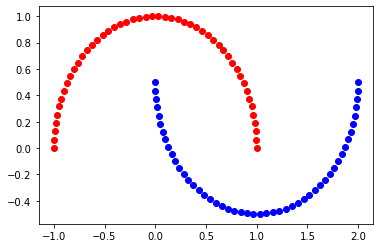

In [14]:
x, y = make_moons(n_samples = 100, random_state=123)
plt.scatter(x[y==0, 0], x[y==0,1], color='red')
plt.scatter(x[y==1, 0], x[y==1,1], color='blue')
plt.show()

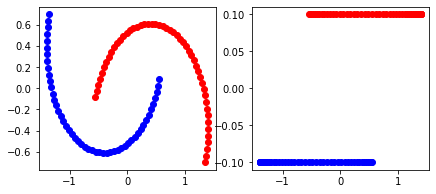

In [19]:
from sklearn.decomposition import PCA
spca = PCA(n_components=2)
x_spca = spca.fit_transform(x)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(x_spca[y==0, 0], x_spca[y==0, 1], color='red')
ax[0].scatter(x_spca[y==1, 0], x_spca[y==1, 1], color='blue')
ax[1].scatter(x_spca[y==0, 0], np.zeros((50,1))+0.1, color='red')
ax[1].scatter(x_spca[y==1, 0], np.zeros((50,1))-0.1, color='blue')
plt.show()
#첫번째 그림에서 일반적인 pca변환이 두 샘플을 선형적으로 구분할 수 있도록 하는데 별로 도움이 안 되는 것을 확인할 수 있음
#두번째 그림에서도 pca로 변환된 특성의 첫번째 성분이 선형구분에 별로 도움이 안됨을 알 수 있음

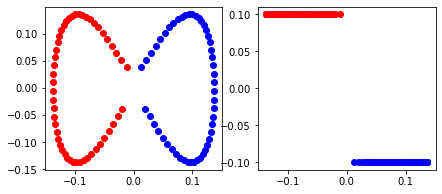

In [30]:
x_pca = rbf_kernel_pca(x, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(x_pca[y==0, 0], x_pca[y==0, 1], color='red')
ax[0].scatter(x_pca[y==1, 0], x_pca[y==1, 1], color='blue')
ax[1].scatter(x_pca[y==0, 0], np.zeros((50,1))+0.1, color='red')
ax[1].scatter(x_pca[y==1, 0], np.zeros((50,1))-0.1, color='blue')
plt.show()
#커널 pca를 활용하여 특성을 변환하면 선형 분류에 도움이 되도록 변환됨을 알 수 있음
#make_Circles 함수를 사용해 동심원 두 개로 이루어진 샘플을 사용해도 커널 pca를 활용하면 선형 분류에 도움이 되도록 변환할 수 있음.

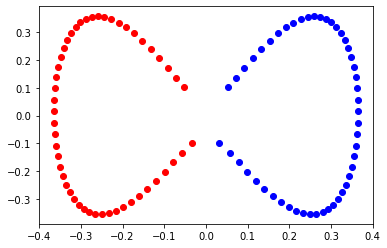

In [31]:
from sklearn.decomposition import KernelPCA
x, y = make_moons(n_samples = 100, random_state=123)
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma=15)
xkpca = kpca.fit_transform(x)
plt.scatter(xkpca[y==0, 0], xkpca[y==0,1], color='red')
plt.scatter(xkpca[y==1, 0], xkpca[y==1,1], color='blue')
plt.show()
#sklearn의 kernelpca클래스를 통해서 kernelpca를 실행할 수 있음
#locally linear embedding(지역 선형 임베딩)은 이웃한 샘플 간의 거리를 유지하는 저차원 투영을 한다.
#t-SNE(t-distributed stochastic neighbor embedding)은 데이터 포인트 간의 유사도를 결합 확률로 변환하고, 저차원과 고차원
#확률 사이에서 쿨백-라이블러 발산을 최소화. 이 기법은 고차원 데이터셋을 시각화하는데 뛰어남.

In [15]:
a=np.array([[1,1],[2,2],[3,3]])
b=np.array([[2,2],[3,3],[1,1]])
c=np.array([[3,3],[2,2],[1,1]])
d = np.asarray([a,b,c])
e = np.average(d,axis=1)

In [16]:
e

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [17]:
d

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[2, 2],
        [3, 3],
        [1, 1]],

       [[3, 3],
        [2, 2],
        [1, 1]]])